In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pyFTS.benchmarks import Measures
import math
from pyFTS.common import Util
import datetime
import statistics
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv')
data = df.drop(labels=['rv1','rv2'], axis=1)
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [29]:
# diff = data.loc[:,'lights':'Tdewpoint']
# diff = diff.diff()
# diff['Appliances'] = data['Appliances']
# data = diff.dropna()

In [10]:
data_scaler = data.loc[:,'lights':'Tdewpoint']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_scaler)
df_scaled = pd.DataFrame(scaled, columns=list(data_scaler.columns))
df_scaled['Appliances'] = data['Appliances']
data = df_scaled
data

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances
0,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,60
1,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,60
2,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,50
3,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,50
4,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.000000,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.701645,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,100
19731,0.000000,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,90
19732,0.142857,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.687457,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,270
19733,0.142857,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.682617,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,420


In [30]:
# data['AppliancesEndog']= data['Appliances'].copy()
# data

In [11]:
train_percentage = round(0.75*len(data))
train = data[0:train_percentage]
test = data[train_percentage:len(data)]

In [12]:
model=sm.tsa.SARIMAX(endog=train['Appliances'],exog=train.loc[:,'lights':'Tdewpoint'],
 order=[3,1,2],
 seasonal_order=(0,0,0,0),
 enforce_invertibility=False, 
 enforce_stationarity=False)

In [13]:
sarimax = model.fit()

In [14]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Appliances   No. Observations:                14801
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -83700.397
Date:                Wed, 16 Jun 2021   AIC                         167462.794
Time:                        16:45:50   BIC                         167698.462
Sample:                             0   HQIC                        167541.038
                              - 14801                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
lights         35.4243      5.743      6.168      0.000      24.169      46.680
T1            -64.2033     94.800     -0.677      0.498    -250.008     121.601
RH_1        -1007.8777     24.309    -41.460      0.000   -1055.523    -960.232
T2            347.3630     86.791      4.002      0.000     177.256     517.470
RH_2         -155.8677     52.772     -2.954      0.003    -259.299     -52.436
T3          -1162.2838     77.738    -14.951      0.000   -1314.647   -1009.921
RH_3         -381.0224     43.670     -8.725      0.000    -466.614    -295.431
T4           -529.4815     46.532    -11.379      0.000    -620.683    -438.280
RH_4          188.2270     56.321      3.342      0.001      77.841     298.613
T5             64.1657     57.689      1.112      0.266     -48.902     177.234
RH_5           -1.6282     20.068     -0.081      0.935     -40.960      37.704
T6             23.1665     92.646      0.250      0.803    -158.416     204.749
RH_6          124.9592     40.807      3.062      0.002      44.979     204.940
T7             66.6560    101.210      0.659      0.510    -131.712     265.023
RH_7           28.4261     68.216      0.417      0.677    -105.275     162.127
T8            100.1869     87.718      1.142      0.253     -71.737     272.111
RH_8          239.1157     68.025      3.515      0.000     105.788     372.443
T9            150.6413    118.749      1.269      0.205     -82.102     383.385
RH_9         -210.8410     54.514     -3.868      0.000    -317.687    -103.995
T_out         -50.3151    401.802     -0.125      0.900    -837.833     737.202
Press_mm_hg   -46.9179     95.512     -0.491      0.623    -234.117     140.282
RH_out       -150.3851    191.430     -0.786      0.432    -525.580     224.810
Windspeed     -51.3733     30.755     -1.670      0.095    -111.652       8.905
Visibility      8.4807     13.805      0.614      0.539     -18.577      35.539
Tdewpoint     168.1138    276.069      0.609      0.543    -372.972     709.200
ar.L1           1.4219      0.025     56.783      0.000       1.373       1.471
ar.L2          -0.5677      0.021    -26.708      0.000      -0.609      -0.526
ar.L3           0.1179      0.006     20.114      0.000       0.106       0.129
ma.L1          -1.5913      0.024    -65.531      0.000      -1.639      -1.544
ma.L2           0.5880      0.025     23.895      0.000       0.540       0.636
sigma2       4845.7966     26.181    185.085      0.000    4794.482    4897.111
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):            252720.41
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             2.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.47
===================================================================================

Warnings:
[1] Co

In [15]:
start = len(train)
end = len(train)+ len(test) -1

In [22]:
#test

In [17]:
forecasts = sarimax.predict(start=start, end=end, exog=test.loc[:,'lights':'Tdewpoint'], typ='linear')

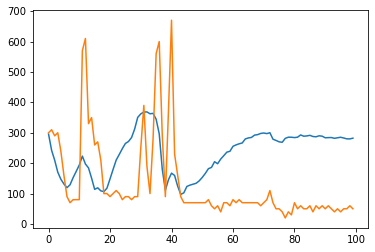

In [18]:
plt.plot(forecasts.values[1000:1100])
plt.plot(test['Appliances'].values[1000:1100])

In [19]:
Measures.rmse(forecasts.values, test['Appliances'].values)

299.90095232944327

In [21]:
#test

In [23]:
def train_arima(train, order):
    model=sm.tsa.SARIMAX(endog=train['Appliances'],exog=train.loc[:,'lights':'Tdewpoint'],order=(3, 1, 2),
                            enforce_invertibility=False, enforce_stationarity=False)
    arima = model.fit()
    return arima


def predict_arima(model,start,end,test):
    forecasts = model.predict(start=start, end=end, exog=test.loc[:,'lights':'Tdewpoint'])
    return forecasts
    

In [24]:
forecasts = []
appliances = []
result = {
     "window": [],
     "rmse": [],
     "mape": [],
     "smape": []
}

tam = len(data)
n_windows = 30
windows_length = math.floor(tam / n_windows)
for ct, ttrain, ttest in Util.sliding_window(data, windows_length, 0.75, inc=1):
    if len(ttest) > 0:
        start = len(ttrain)
        end = len(ttrain)+ len(ttest) -1
        appliance = ttest['Appliances'].reset_index()
        print('-' * 20)
        print(f'training window {(ct)}')
        model = train_arima(ttrain, [3, 1, 2])
        forecast = predict_arima(model, start, end, ttest)
        
        print("[{0: %H:%M:%S}]".format(datetime.datetime.now()) + f" getting statistics")
        appliance.pop('index')
        appliances = [i[0] for i in appliance.values]
        rmse = Measures.rmse(appliances,forecast)
        mape = Measures.mape(appliances,forecast)
        smape = Measures.smape(appliances,forecast)
        
        forecasts.append(forecast)
        appliances.append(appliances)
        
#         # Grafico de comparação Original x Previsto para cada janela
#         fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
#         ax.plot(appliance, label='Original')
#         ax.plot(forecast, label='Forecast')
#         handles, labels = ax.get_legend_handles_labels()
#         lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
#         plt.show()
        
        result["rmse"].append(rmse)
        result["mape"].append(mape)
        result["smape"].append(smape)
        result["window"].append(ct)

measures = pd.DataFrame(result)



--------------------
training window 0
[ 16:46:39] getting statistics
--------------------
training window 657
[ 16:46:42] getting statistics
--------------------
training window 1314
[ 16:46:46] getting statistics
--------------------
training window 1971
[ 16:46:53] getting statistics
--------------------
training window 2628


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:47:02] getting statistics
--------------------
training window 3285


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:47:10] getting statistics
--------------------
training window 3942
[ 16:47:18] getting statistics
--------------------
training window 4599


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:47:26] getting statistics
--------------------
training window 5256


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:47:36] getting statistics
--------------------
training window 5913
[ 16:47:41] getting statistics
--------------------
training window 6570
[ 16:47:46] getting statistics
--------------------
training window 7227
[ 16:47:51] getting statistics
--------------------
training window 7884
[ 16:47:54] getting statistics
--------------------
training window 8541
[ 16:47:57] getting statistics
--------------------
training window 9198
[ 16:48:02] getting statistics
--------------------
training window 9855
[ 16:48:07] getting statistics
--------------------
training window 10512
[ 16:48:13] getting statistics
--------------------
training window 11169


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:48:20] getting statistics
--------------------
training window 11826
[ 16:48:23] getting statistics
--------------------
training window 12483
[ 16:48:26] getting statistics
--------------------
training window 13140
[ 16:48:30] getting statistics
--------------------
training window 13797
[ 16:48:36] getting statistics
--------------------
training window 14454
[ 16:48:40] getting statistics
--------------------
training window 15111
[ 16:48:44] getting statistics
--------------------
training window 15768
[ 16:48:48] getting statistics
--------------------
training window 16425
[ 16:48:51] getting statistics
--------------------
training window 17082
[ 16:48:54] getting statistics
--------------------
training window 17739


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[ 16:48:59] getting statistics
--------------------
training window 18396
[ 16:49:02] getting statistics
--------------------
training window 19053
[ 16:49:08] getting statistics


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
measures

,window,rmse,mape,smape
0,0,124.519479,112.564218,36.785091
1,657,133.142634,69.309943,28.385723
2,1314,196.045683,59.922795,45.404475
3,1971,32.058293,48.835757,28.703357
4,2628,115.677876,45.785071,30.941140
5,3285,83.305661,122.812900,35.219756
6,3942,143.669887,109.026319,35.244354
7,4599,134.796657,106.074035,66.164478
8,5256,113.958343,194.510016,41.929953
9,5913,135.795345,77.634157,31.389535


In [25]:
print("Mean: ")
print(statistics.mean(measures['rmse']))
print(statistics.mean(measures['mape']))
print(statistics.mean(measures['smape']))

Mean: 
333.7879026086272
436.3707724081426
67.49909544955146
